In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [4]:
# Print the city count to confirm sufficient count
len(cities)

631

In [5]:
# Convert city list to dataframe and rename column to "city"
cities_df = pd.DataFrame(cities)
cities_df.columns = ["city"]
cities_df.head()

,city
0,port alfred
1,bluff
2,adre
3,busselton
4,punta arenas


In [74]:
# Add columns to cities dataframe
cities_df["Cloudiness"] = np.nan
cities_df["Country"] = np.nan
cities_df["Date"] = np.nan
cities_df["Humidity"] = np.nan
cities_df["Lat"] = np.nan
cities_df["Lng"] = np.nan
cities_df["Max Temp"] = np.nan
cities_df["Wind Speed"] = np.nan
cities_df.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bluff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,adre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,busselton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,punta arenas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Perform API Calls
-  Perform a weather check on each city using a series of successive API calls.
-  Include a print log of each city as it's being processed (with the city number and city name).

In [75]:
# Save config information
print("Beginning Data Retrieval")
print("___________________________")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

# Use iterrows to loop through dataframe using the city name

for index, row in cities_df.iterrows():
    city = row["city"]
    print(f"Retrieving Results for Index {index}: {city}")
    response = requests.get(query_url + city).json()
    
    try:      
        cities_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        cities_df.loc[index, "Humidity"]= response["main"]["humidity"]
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
        print(f"Processing Record {index} | {city}")
        
    except (KeyError, IndexError):
        print("City not found...Skipping.")

Beginning Data Retrieval
___________________________
Retrieving Results for Index 0: port alfred
Processing Record 0 | port alfred
Retrieving Results for Index 1: bluff
Processing Record 1 | bluff
Retrieving Results for Index 2: adre
Processing Record 2 | adre
Retrieving Results for Index 3: busselton
Processing Record 3 | busselton
Retrieving Results for Index 4: punta arenas
Processing Record 4 | punta arenas
Retrieving Results for Index 5: katsuura
Processing Record 5 | katsuura
Retrieving Results for Index 6: lasa
Processing Record 6 | lasa
Retrieving Results for Index 7: bandarbeyla
Processing Record 7 | bandarbeyla
Retrieving Results for Index 8: ponta delgada
Processing Record 8 | ponta delgada
Retrieving Results for Index 9: gorom-gorom
Processing Record 9 | gorom-gorom
Retrieving Results for Index 10: taolanaro
City not found...Skipping.
Retrieving Results for Index 11: illoqqortoormiut
City not found...Skipping.
Retrieving Results for Index 12: komsomolskiy
Processing Record 

City not found...Skipping.
Retrieving Results for Index 112: byron bay
Processing Record 112 | byron bay
Retrieving Results for Index 113: kahului
Processing Record 113 | kahului
Retrieving Results for Index 114: belmonte
Processing Record 114 | belmonte
Retrieving Results for Index 115: bredasdorp
Processing Record 115 | bredasdorp
Retrieving Results for Index 116: east london
Processing Record 116 | east london
Retrieving Results for Index 117: atuona
Processing Record 117 | atuona
Retrieving Results for Index 118: mehamn
Processing Record 118 | mehamn
Retrieving Results for Index 119: saint-philippe
Processing Record 119 | saint-philippe
Retrieving Results for Index 120: pisco
Processing Record 120 | pisco
Retrieving Results for Index 121: ijaki
City not found...Skipping.
Retrieving Results for Index 122: black river
Processing Record 122 | black river
Retrieving Results for Index 123: ponta do sol
Processing Record 123 | ponta do sol
Retrieving Results for Index 124: bukama
Process

Processing Record 219 | batagay
Retrieving Results for Index 220: zhangjiakou
Processing Record 220 | zhangjiakou
Retrieving Results for Index 221: mgandu
Processing Record 221 | mgandu
Retrieving Results for Index 222: lagoa
Processing Record 222 | lagoa
Retrieving Results for Index 223: isangel
Processing Record 223 | isangel
Retrieving Results for Index 224: canico
Processing Record 224 | canico
Retrieving Results for Index 225: ouadda
Processing Record 225 | ouadda
Retrieving Results for Index 226: sinnamary
Processing Record 226 | sinnamary
Retrieving Results for Index 227: mali
Processing Record 227 | mali
Retrieving Results for Index 228: isla vista
Processing Record 228 | isla vista
Retrieving Results for Index 229: leshukonskoye
Processing Record 229 | leshukonskoye
Retrieving Results for Index 230: cidreira
Processing Record 230 | cidreira
Retrieving Results for Index 231: ayios matthaios
City not found...Skipping.
Retrieving Results for Index 232: jhang
Processing Record 232

Processing Record 330 | suluq
Retrieving Results for Index 331: nizhneyansk
City not found...Skipping.
Retrieving Results for Index 332: porto walter
Processing Record 332 | porto walter
Retrieving Results for Index 333: victoria
Processing Record 333 | victoria
Retrieving Results for Index 334: hwange
Processing Record 334 | hwange
Retrieving Results for Index 335: bud
Processing Record 335 | bud
Retrieving Results for Index 336: venado
Processing Record 336 | venado
Retrieving Results for Index 337: zhanaozen
Processing Record 337 | zhanaozen
Retrieving Results for Index 338: salalah
Processing Record 338 | salalah
Retrieving Results for Index 339: egvekinot
Processing Record 339 | egvekinot
Retrieving Results for Index 340: ust-ishim
Processing Record 340 | ust-ishim
Retrieving Results for Index 341: pemangkat
City not found...Skipping.
Retrieving Results for Index 342: salym
Processing Record 342 | salym
Retrieving Results for Index 343: alofi
Processing Record 343 | alofi
Retrievi

Processing Record 441 | blagoyevo
Retrieving Results for Index 442: doka
Processing Record 442 | doka
Retrieving Results for Index 443: riyadh
Processing Record 443 | riyadh
Retrieving Results for Index 444: provideniya
Processing Record 444 | provideniya
Retrieving Results for Index 445: paraiso
Processing Record 445 | paraiso
Retrieving Results for Index 446: terenga
City not found...Skipping.
Retrieving Results for Index 447: labuhan
Processing Record 447 | labuhan
Retrieving Results for Index 448: puerto narino
Processing Record 448 | puerto narino
Retrieving Results for Index 449: chipata
Processing Record 449 | chipata
Retrieving Results for Index 450: zlatoustovsk
City not found...Skipping.
Retrieving Results for Index 451: atar
Processing Record 451 | atar
Retrieving Results for Index 452: killybegs
Processing Record 452 | killybegs
Retrieving Results for Index 453: hasaki
Processing Record 453 | hasaki
Retrieving Results for Index 454: sentyabrskiy
City not found...Skipping.
R

Processing Record 551 | mareeba
Retrieving Results for Index 552: punta ocote
Processing Record 552 | punta ocote
Retrieving Results for Index 553: botwood
Processing Record 553 | botwood
Retrieving Results for Index 554: ratnagiri
Processing Record 554 | ratnagiri
Retrieving Results for Index 555: lolua
City not found...Skipping.
Retrieving Results for Index 556: verkhnevilyuysk
Processing Record 556 | verkhnevilyuysk
Retrieving Results for Index 557: mount isa
Processing Record 557 | mount isa
Retrieving Results for Index 558: tereze
Processing Record 558 | tereze
Retrieving Results for Index 559: fushun
Processing Record 559 | fushun
Retrieving Results for Index 560: washougal
Processing Record 560 | washougal
Retrieving Results for Index 561: greenwood
Processing Record 561 | greenwood
Retrieving Results for Index 562: lufilufi
Processing Record 562 | lufilufi
Retrieving Results for Index 563: bonavista
Processing Record 563 | bonavista
Retrieving Results for Index 564: teya
Proces

In [76]:
# Confirm API call data has been entered into the dataframe
cities_df.head()

,city,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,0.0,ZA,1.566254e+09,76.0,-33.59,26.89,59.00,5.99
1,bluff,0.0,AU,1.566254e+09,25.0,-23.58,149.07,59.96,10.07
2,adre,79.0,TD,1.566254e+09,86.0,13.47,22.20,70.94,3.09
3,busselton,0.0,AU,1.566254e+09,76.0,-33.64,115.35,39.00,9.28
4,punta arenas,0.0,CL,1.566254e+09,86.0,-53.16,-70.91,39.20,6.93


In [77]:
#Figure out what kind of data is being held in each column
cities_df.dtypes

city           object
Cloudiness    float64
Country        object
Date          float64
Humidity      float64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [96]:
# Convert Date from Epoch time to Date Time 
#cities_df["Date"] = cities_df["Date"].to_datetime(unit='s')

In [82]:
# Export dataframe to csv file
output_data_file = cities_df.to_csv(r"cities.csv")

## Latitude vs. Temperature Plot

In [84]:
cities_df.count()

city          631
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

Text(0, 0.5, 'Max Temperature (F)')

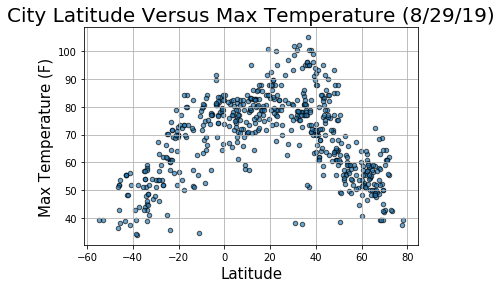

In [93]:
cities_df.plot.scatter(x ='Lat', y ='Max Temp', marker = "o", 
               facecolors = "red", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("City Latitude Versus Max Temperature (8/29/19)", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Max Temperature (F)", size = 15)

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

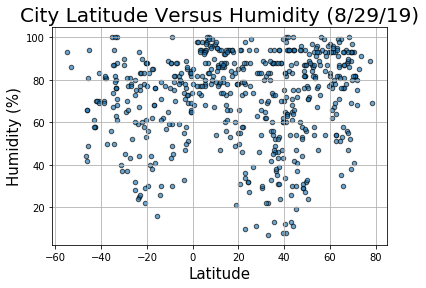

In [90]:
cities_df.plot.scatter(x ="Lat", y ="Humidity", marker = "o", 
               facecolors = "coral", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("City Latitude Versus Humidity (8/29/19)", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Humidity (%)", size = 15) 

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

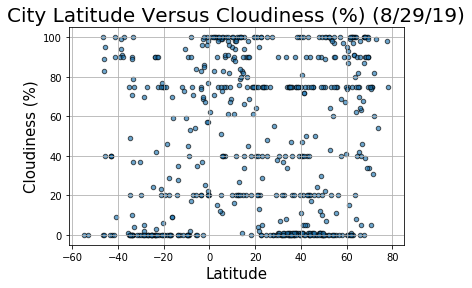

In [91]:
cities_df.plot.scatter(x ="Lat", y ="Cloudiness", marker = "o", 
               facecolors = "coral", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("City Latitude Versus Cloudiness (%) (8/29/19)", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Cloudiness (%)", size = 15)

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Windspeed (mph)')

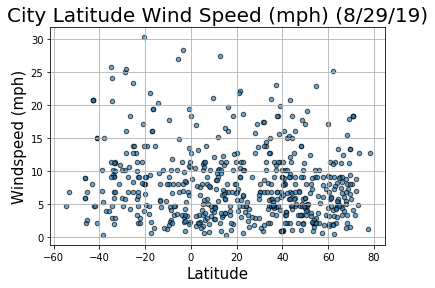

In [92]:
cities_df.plot.scatter(x ="Lat", y ="Wind Speed", marker = "o", 
               facecolors = "coral", edgecolors = "black", alpha = 0.65)

plt.grid(True)
plt.title("City Latitude Wind Speed (mph) (8/29/19)", size= 20)
plt.xlabel("Latitude", size = 15)
plt.ylabel("Windspeed (mph)", size = 15)